In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "cleaned"

# Examining Normality through visualisations and tests

First load the data 

In [2]:
## check directory and files
getwd()
list.files(path = '../input')
list.dirs(path = '..')
list.files(path = '../input')

## read data
countries = read.csv("../input/cleaned/cleaned_countries.csv")

[1] "/kaggle/working"

[1] "cleaned"

[1] ".."               "../input"         "../input/cleaned" "../lib"          
[5] "../lib/kaggle"    "../src"           "../working"

[1] "cleaned"

In [3]:
## basic checks
head(countries)

## dimensions
dim(countries)

,X,Country,Region,Population,Area,Pop._Density,Coastline,Net_migration,Infant_mortality,GDP,⋯,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,landlocked,cluster_labels
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,480,0,2306,16307,700,⋯,22,8765,1.000000,466,2034,38.0,24.0000,38.000,1,2
2,1,Albania,EASTERN EUROPE,3581655,28748,1246,126,-493,2152,4500,⋯,442,7449,3.000000,1511,522,232.0,188.0000,579.000,0,1
3,2,Algeria,NORTHERN AFRICA,32930091,2381740,138,4,-39,31,6000,⋯,25,9653,1.000000,1714,461,101.0,6.0000,298.000,0,1
4,3,American Samoa,OCEANIA,57794,199,2904,5829,-2071,927,8000,⋯,15,75,2.000000,2246,327,115.5,169.6875,473.375,0,1
5,4,Andorra,WESTERN EUROPE,71201,468,1521,0,66,405,19000,⋯,0,9778,3.000000,871,625,18.2,159.4583,492.625,1,3
6,5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,97,13,0,19119,1900,⋯,24,9735,3.479167,4511,242,96.0,658.0000,246.000,0,2


[1] 227  23

# Examine a few columns : Visual plots

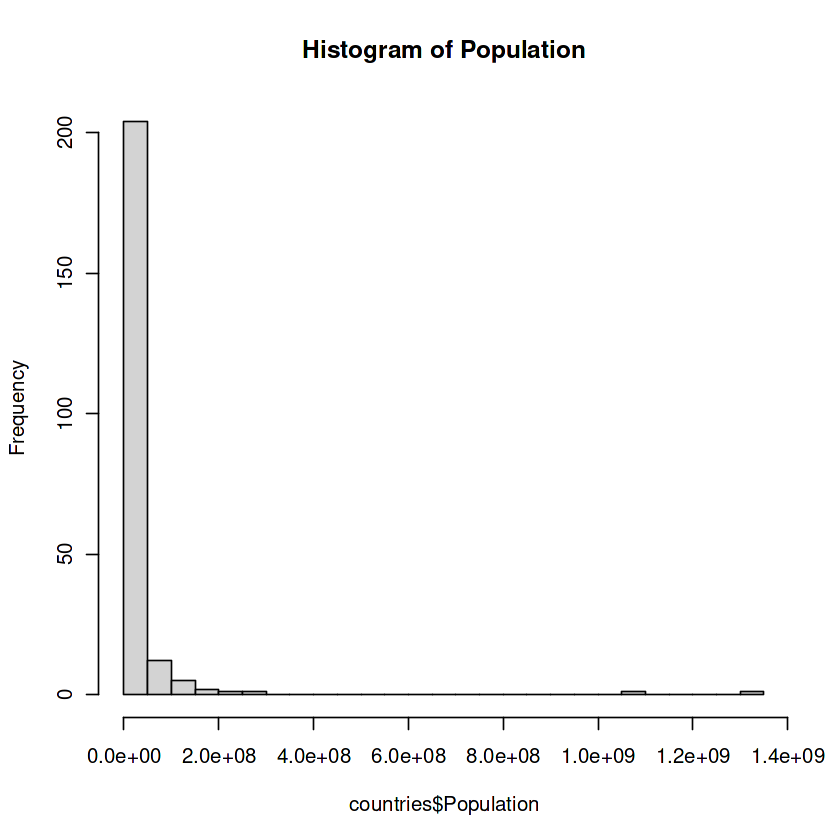

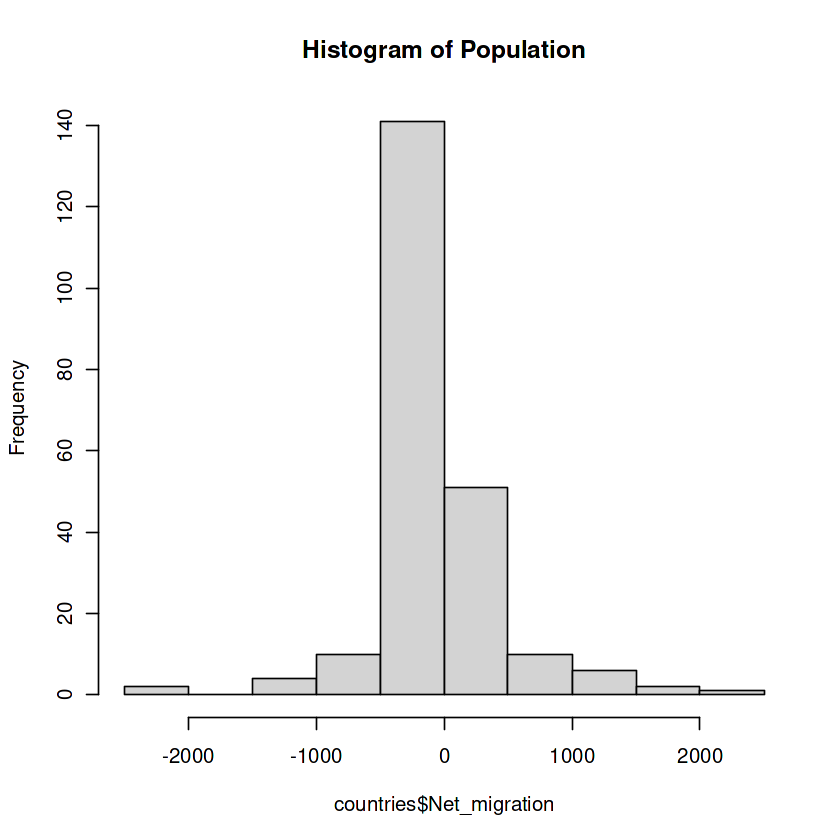

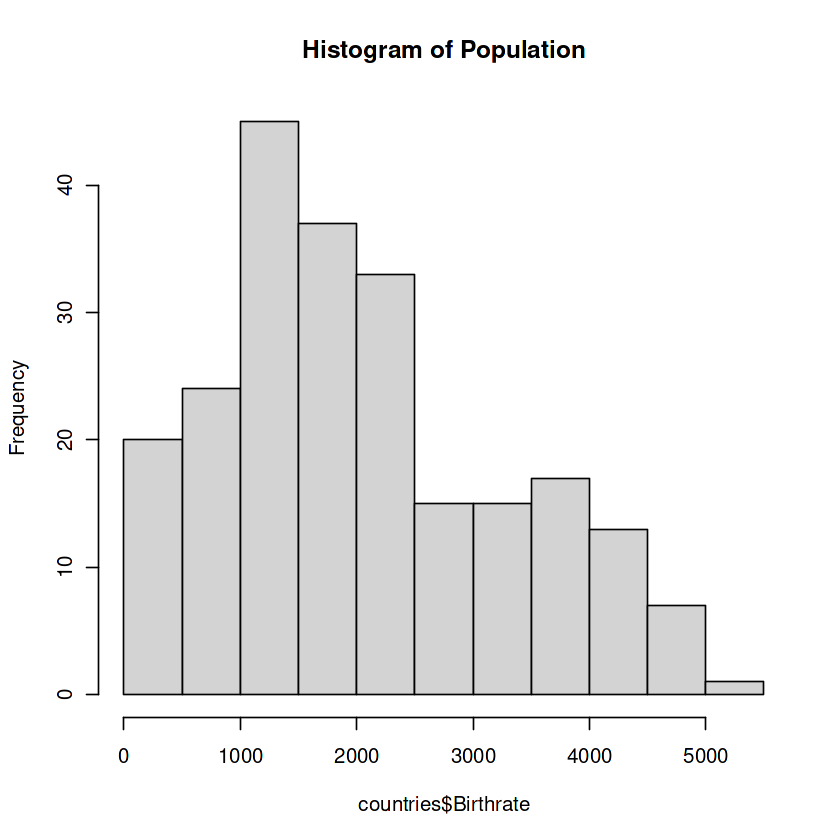

In [4]:
hist(countries$Population, breaks = 30, main = 'Histogram of Population')
hist(countries$Net_migration, breaks = 15, main = 'Histogram of Population')
hist(countries$Birthrate, breaks = 10, main = 'Histogram of Population')

None of the three distributions resemble a normal distribution, but net migration may be the most similar, especially due to the range of values it takes (normal distribution have a support from negative to positive infinity). 

## Apply log to Population

It is common practice to reduce the scale of large quantities, such as population, via log transformations, as this also reduces the extent of anomalies (we can see that there are anomalies here). 

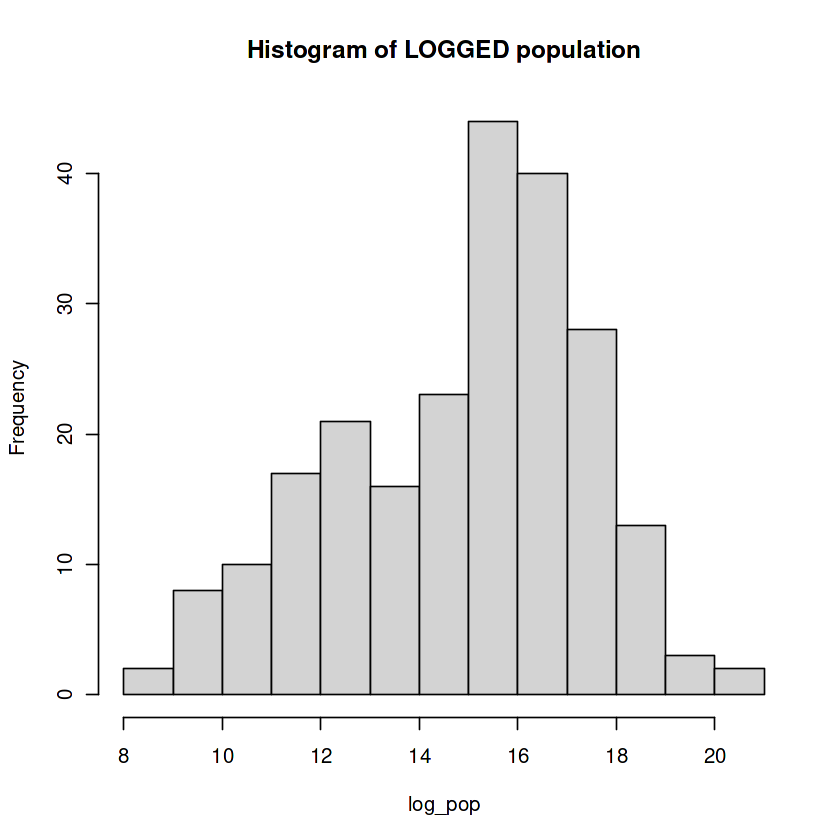

In [5]:
log_pop = log(countries$Population)
hist(log_pop, main ='Histogram of LOGGED population')

There is still a bit of skewness in the distribution -- there seems to still be a bit of a left tail. 

## Apply Box-Cox transformation

The Box-Cox transformation is a type of power transformation designed to stabilise a distribution (in terms of variance) and make it more like a normal distribution. 

From r-bloggers.com, we have 

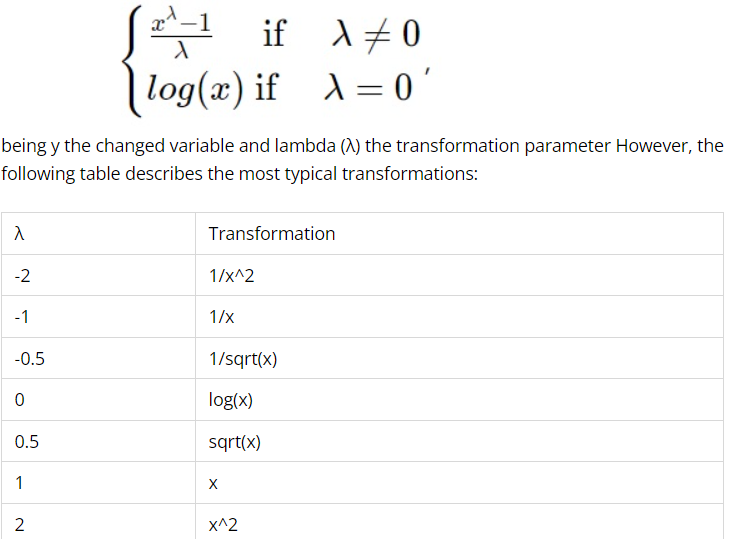

In [6]:
library(MASS)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




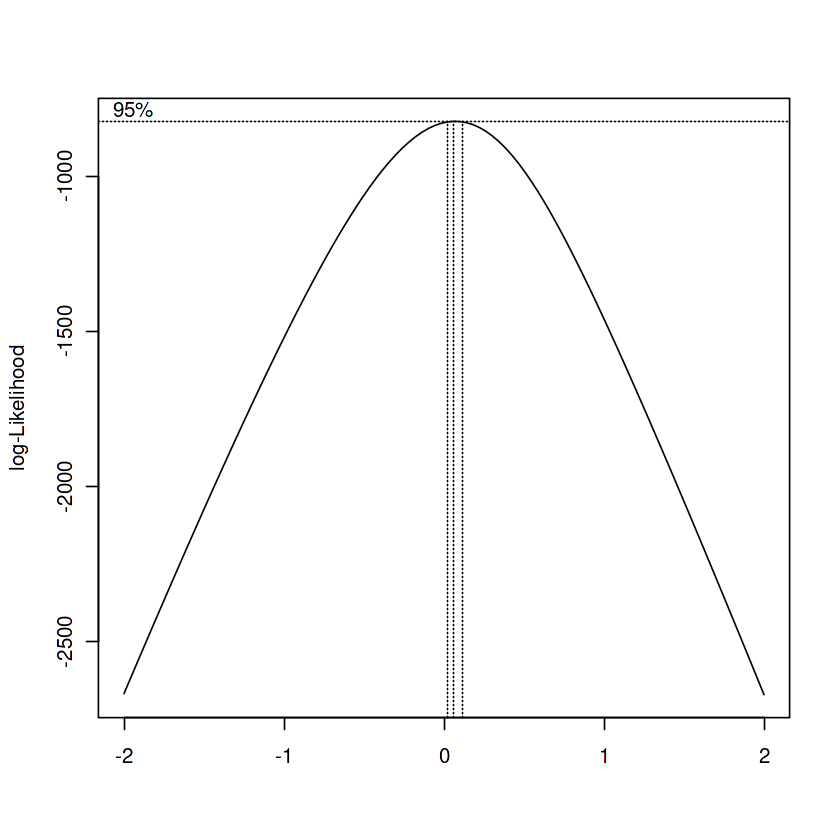

In [7]:
box_coxed_pop = boxcox(countries$Population ~1,
                      lambda = seq(-2,2,by = 0.1))

From the box-cox algorithm, it is further confirmed that log transformation is useful for normalising the data. 

## Other visualisations: QQ plots

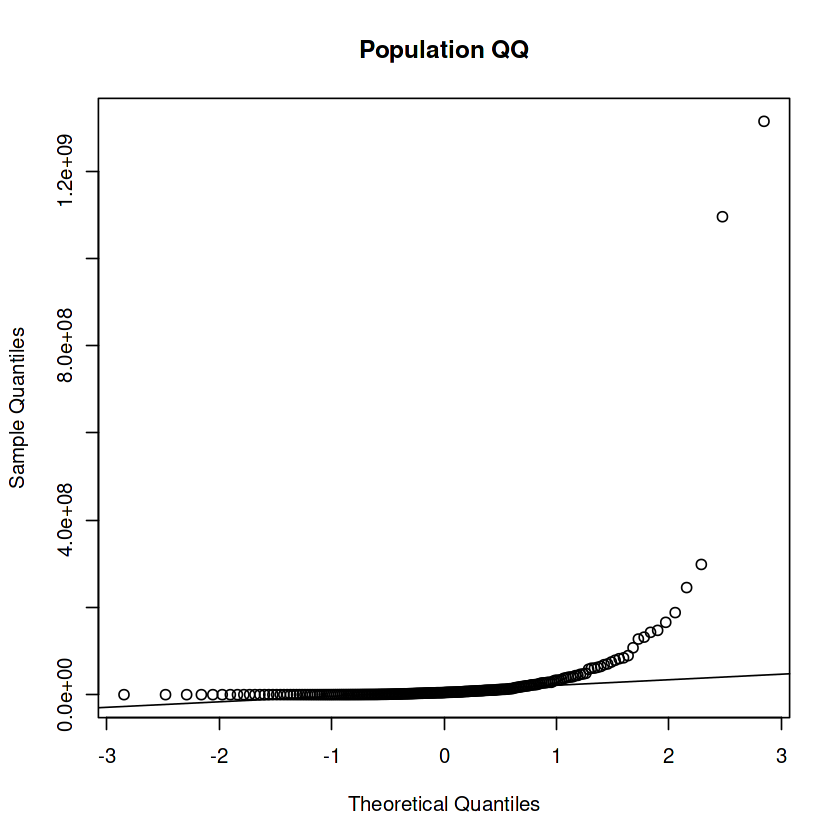

In [8]:
qqnorm(countries$Population, main = 'Population QQ')
qqline(countries$Population)

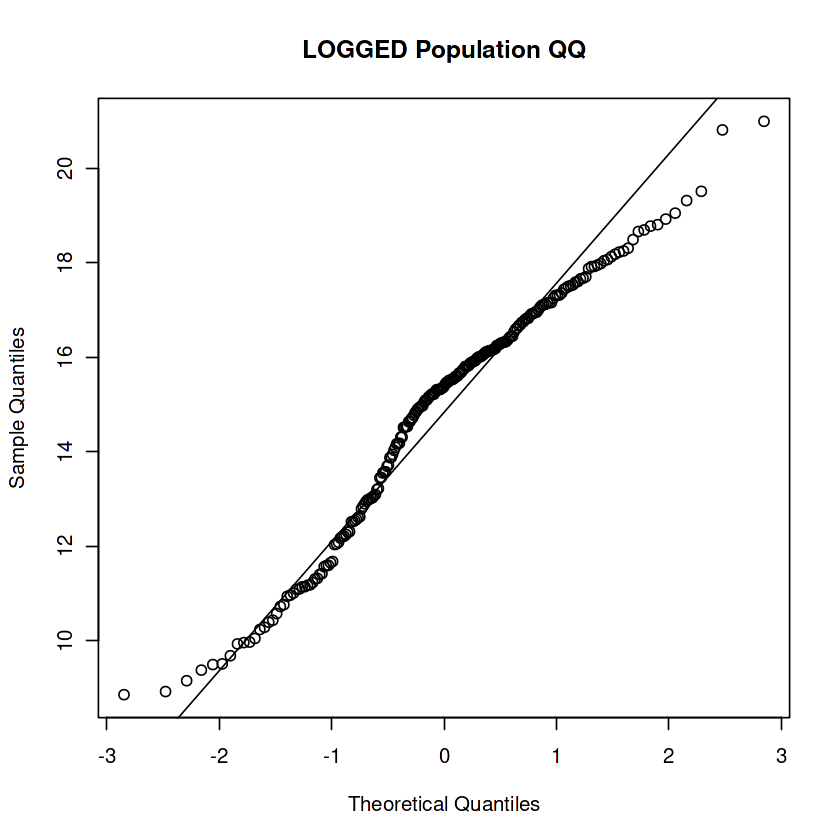

In [9]:
qqnorm(log_pop, main = 'LOGGED Population QQ')
qqline(log_pop)

Normality has been significantly improved post log transformation. 

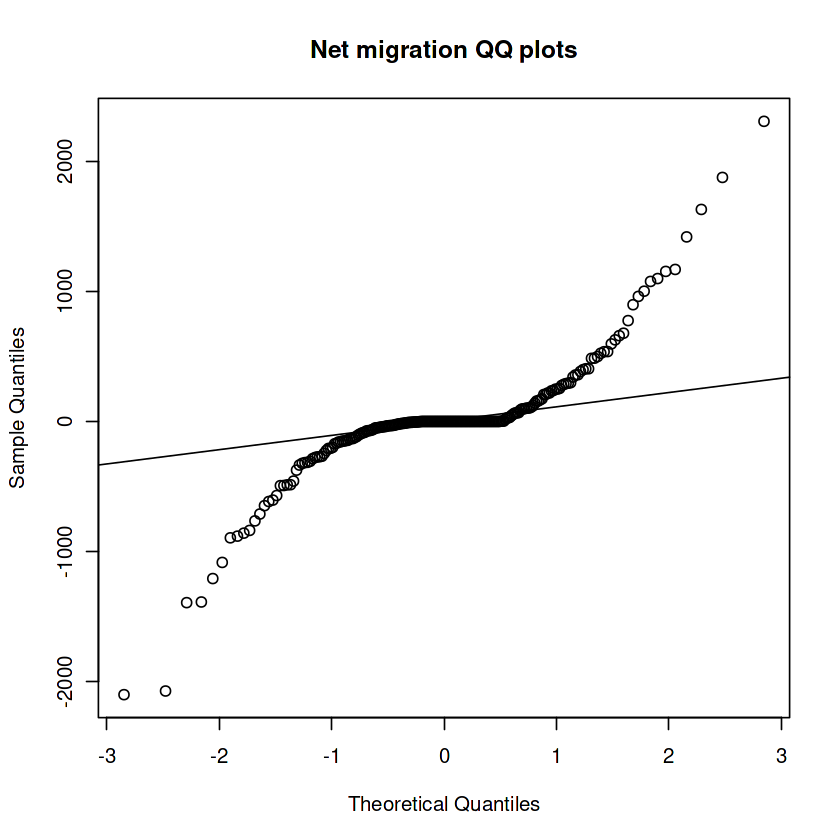

In [10]:
qqnorm(countries$Net_migration, main = 'Net migration QQ plots')
qqline(countries$Net_migration)

Here we see it more clearly - while the middle values (ranked) of net migration are closely normal, the tails diverge wildly, signifying that the extreme values of net migration are indeed more extreme than a normal distribution would entail.

# Quantitative tests : Shapiro Wilk, Kolmogorov-Smirnov

Shapiro-Wilk test: best power for given significance for tests of normality 

While SW checks directly for normality, the KS test checks for similarity to a specified distribution, and checks it via the culmulative distribution function by comparing the two CDFs (the given data, and the theoretical CDF of a specified distribution)

For SW: 

$H_0 = Population \ normally \ distributed \\ $
$H_1 = Population \ not \ normally \ distributed$

For KS:

$H_0 = Data \ follows \ specified \ distribution\\ $
$H_1 = Data \ does \ not \ follow \ specified \ distribution$

In [11]:
## Shapiro Wilk test 
shapiro.test(countries$Population)
shapiro.test(log_pop)
shapiro.test(countries$Net_migration)
shapiro.test(countries$Birthrate)


	Shapiro-Wilk normality test

data:  countries$Population
W = 0.20926, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  log_pop
W = 0.96847, p-value = 6.114e-05



	Shapiro-Wilk normality test

data:  countries$Net_migration
W = 0.79409, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  countries$Birthrate
W = 0.95447, p-value = 1.352e-06


## Kolmogorov-Smirnov tests

In [12]:
## KS test
ks.test(countries$Population, y = 'pnorm')
ks.test(log_pop, y = 'pnorm')
ks.test(countries$Net_migration, y = 'pnorm') ## get a TIES issue


	One-sample Kolmogorov-Smirnov test

data:  countries$Population
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided



	One-sample Kolmogorov-Smirnov test

data:  log_pop
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided


Warning message in ks.test(countries$Net_migration, y = "pnorm"):
“ties should not be present for the Kolmogorov-Smirnov test”



	One-sample Kolmogorov-Smirnov test

data:  countries$Net_migration
D = 0.40834, p-value < 2.2e-16
alternative hypothesis: two-sided


# ANOVA - categorical variables

Does GDP change with different regions?

In [13]:
summary(aov(GDP ~ Region, data = countries))

             Df    Sum Sq   Mean Sq F value Pr(>F)    
Region       10 1.323e+10 1.323e+09   30.03 <2e-16 ***
Residuals   216 9.513e+09 4.404e+07                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Crucially, this relies on the assumption that the data are from normal distributions, and have same variances. 

In [14]:
# install.packages("remotes")
remotes::install_github("R-CoderDotCom/ridgeline@main")

library(ridgeline)

── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpOpLVpf/remotese6c7615e8/R-CoderDotCom-ridgeline-eb4111b/DESCRIPTION’ ... OK
* preparing ‘ridgeline’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘ridgeline_1.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [15]:
short_form  = sapply(unique(countries$Region), function(x) substr(x,1,6) )

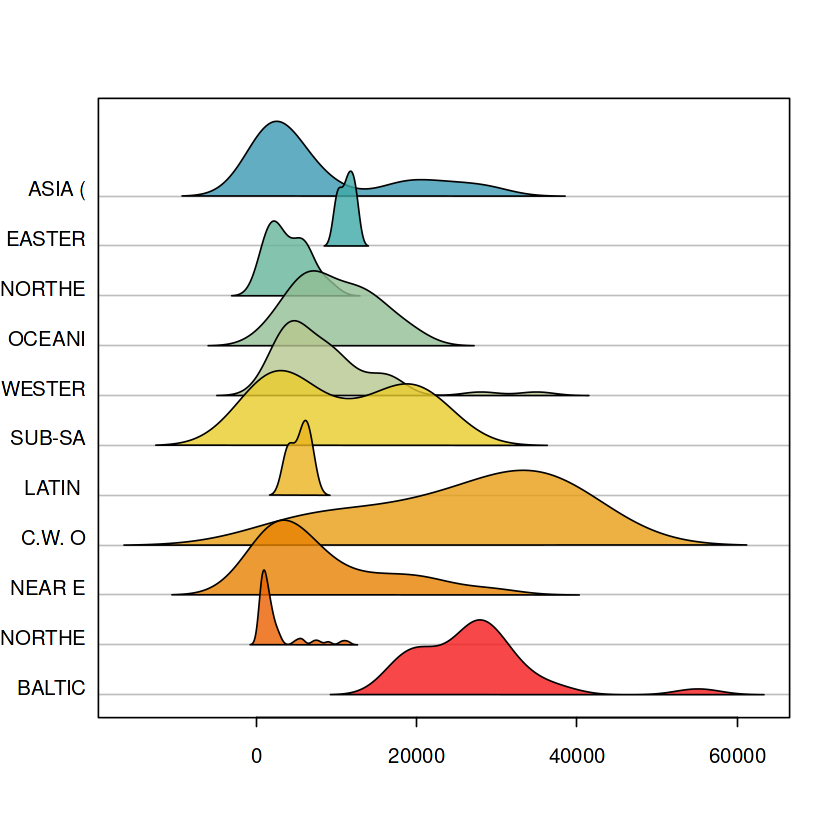

In [16]:
ridgeline(countries$GDP, countries$Region, labels = short_form)

We see that the assumptions of ANOVA are most likely violated here, hence interpreting the p value is most likely invalid. 

## Repeat for logged GDP

In [17]:
countries <- countries %>% mutate(GDP_logged = log(GDP))

## Check
print(head(countries$GDP_logged))
print(head(countries$GDP))

[1] 6.551080 8.411833 8.699515 8.987197 9.852194 7.549609
[1]   700  4500  6000  8000 19000  1900


In [18]:
summary(aov(GDP_logged ~ Region, data = countries))

             Df Sum Sq Mean Sq F value Pr(>F)    
Region       10  169.9  16.993      24 <2e-16 ***
Residuals   216  152.9   0.708                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

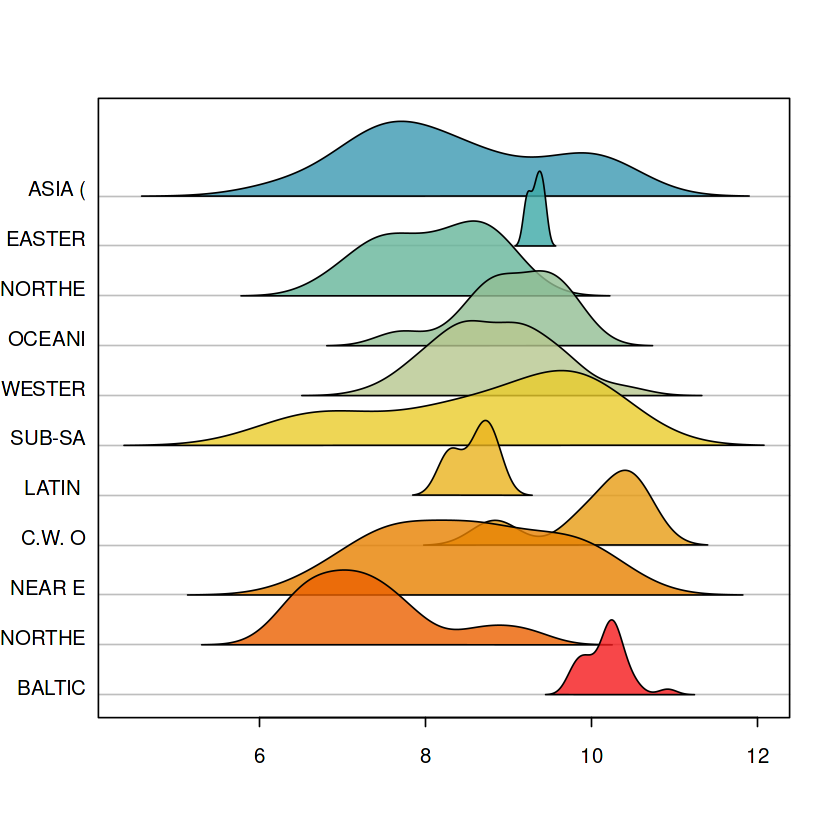

In [19]:
ridgeline(countries$GDP_logged, countries$Region, labels = short_form)

It seems that log transformation + segmenting by region does seem to increase normality.

We can now repeat the Shapiro tests on the regions separately, for both GDP and logged GDP

In [20]:
tapply(countries$GDP, countries$Region, FUN = shapiro.test)

$`ASIA (EX. NEAR EAST)         `

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.74911, p-value = 1.528e-05


$`BALTICS                            `

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.99324, p-value = 0.8428


$`C.W. OF IND. STATES `

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.91886, p-value = 0.2766


$`EASTERN EUROPE                     `

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.97078, p-value = 0.9188


$`LATIN AMER. & CARIB    `

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.80305, p-value = 2.777e-06


$`NEAR EAST                          `

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.87417, p-value = 0.03152


$`NORTHERN AFRICA                    `

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.89022, p-value = 0.3193


$`NORTHERN AMERICA                   `

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.90966, p-value = 0.4655


$`OCEANIA                            `

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.82759, p

Does this agree with the eye-test?

From the SW tests, we see that 

## Quantitative test of equality of variances 

In [21]:
bartlett.test(GDP ~ Region, data = countries)

?bartlett.test


	Bartlett test of homogeneity of variances

data:  GDP by Region
Bartlett's K-squared = 95.597, df = 10, p-value = 4.13e-16


The Bartlett test of equality of variances have also produced, as expected, a small p value, indicating strong evidence against the null hypothesis that the variances are equal. 

# Chi squared test between categorical variables 

The chi-squared test for independence determines if there is a significant relationship between 2 categorical variables. It makes a contingency table between the variables, and estimates the expected value in each entry assuming the variables were independent. Then it compares the differences between the expected and the actual values and tests it against the **Chi squared** distribution. 

In [22]:
table(Region = countries$Region, landlocked = countries$landlocked)

                                     landlocked
Region                                 0  1
  ASIA (EX. NEAR EAST)                23  5
  BALTICS                              3  0
  C.W. OF IND. STATES                  3  9
  EASTERN EUROPE                       7  5
  LATIN AMER. & CARIB                 43  2
  NEAR EAST                           15  1
  NORTHERN AFRICA                      6  0
  NORTHERN AMERICA                     5  0
  OCEANIA                             21  0
  SUB-SAHARAN AFRICA                  35 16
  WESTERN EUROPE                      22  6

In [23]:
## Our region names are too long -- create a function to extract 
## initials only 
get_initials <- function(name) {
  sapply(strsplit(name, " "), function(x) paste(substr(x, 1, 2), collapse = ""))
}

## Check
unique(get_initials(countries$Region))
         
## Apply
countries['Region_initials'] = get_initials(countries$Region)

[1] "AS(ENEEA" "EAEU"     "NOAF"     "OC"       "WEEU"     "SUAF"    
 [7] "LAAM&CA"  "C.OFINST" "NEEA"     "NOAM"     "BA"


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




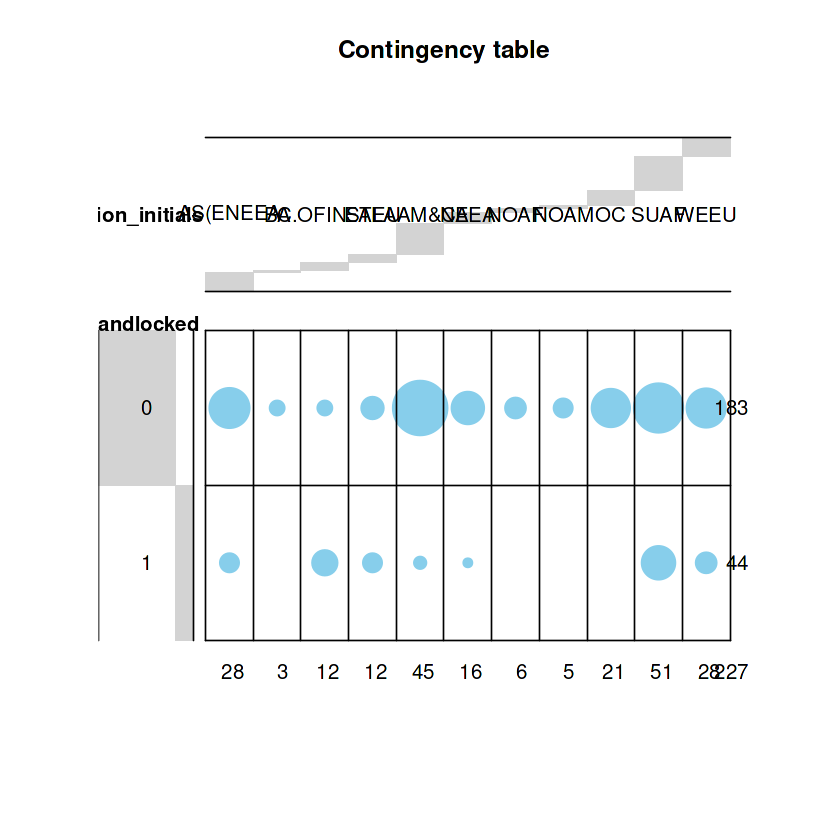

In [24]:
library('gplots')

dt = countries %>% dplyr::select('Region_initials', 'landlocked') %>% 
                table() %>%
                as.matrix() %>% as.table() 

balloonplot(dt, main = 'Contingency table', label = F)

Another way to visualise this is via mosaic plots

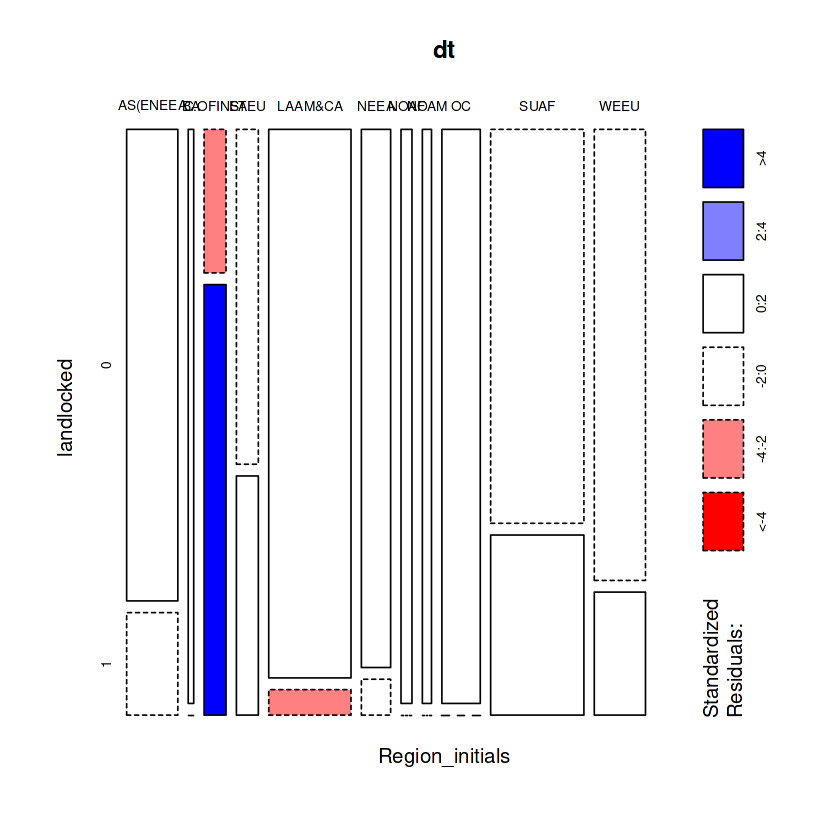

In [25]:
library('graphics')
mosaicplot(dt, shade= T)

Here we can immediately see two things 

* size of reach region (in terms of number of countries) -- Baltics and 